<a href="https://colab.research.google.com/github/MartaAmoresCastillejo/LAB04/blob/main/LAB04PRAC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import sklearn as sk 
import matplotlib.pyplot as plt 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('enfermeria.csv', encoding = 'latin_1')
data

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [3]:
data.isnull().values.any()

False

In [4]:
data.describe()

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [5]:
import pandas as pd

# Seleccionar solo variables categóricas
#df_cat = data.select_dtypes(include=['object'])

# Codificar las variables categóricas
#df_dummies = pd.get_dummies(df_cat)

# Combinar las variables categóricas codificadas con las variables numéricas originales
#data = pd.concat([data.select_dtypes(include=['float64', 'int64']), df_dummies], axis=1)

In [6]:
le = LabelEncoder()
for col in data.columns: #Cambiar los strings del dataframe de x
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

data

,parents_occupation,childs_nursery,family_form,number_children,housing_conditions,financial_standing,social_conditions,health_conditions,recommendation
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [7]:
from sklearn.preprocessing import StandardScaler

# crear un objeto StandardScaler
scaler = StandardScaler()

# estandarizar los datos
data_estandarizada = scaler.fit_transform(data)


In [8]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data)

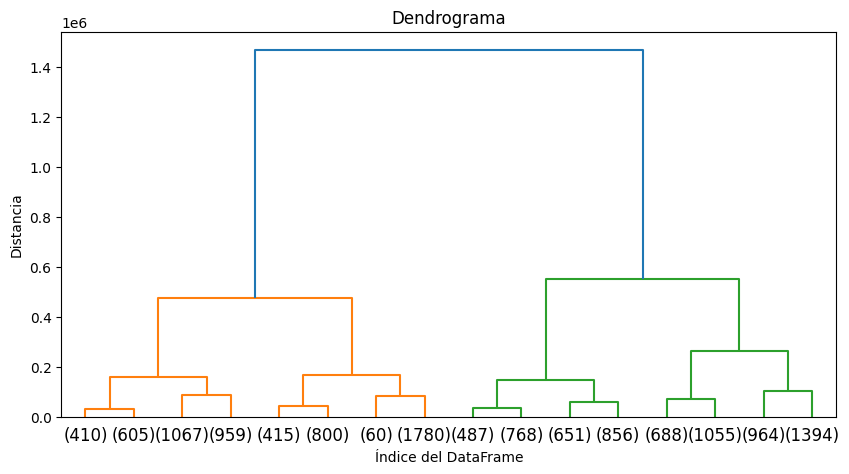

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_mat = linkage(model.children_, "ward")
plt.figure(figsize=(10, 5))
dendrogram(linkage_mat, truncate_mode='level', p=3)
plt.title('Dendrograma')
plt.xlabel('Índice del DataFrame')
plt.ylabel('Distancia')
plt.show()

In [ ]:
algoritmo = AgglomerativeClustering(n_clusters = 2, 
                                    metric='manhattan', compute_full_tree=True, linkage='complete') 
algoritmo.fit(data)

pred1 = algoritmo.fit_predict(data)

In [ ]:
algoritmo1 = AgglomerativeClustering(n_clusters = 2, 
                                    affinity='euclidean', linkage='ward') 
algoritmo1.fit(data)

pred2 = algoritmo1.fit_predict(data)

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data, pred1)
score1 = silhouette_score(data, pred2)

print("Silhouette score: ", score)
print("Silhouette score: ", score1)

In [ ]:
data['cluster'] = algoritmo.labels_
data

In [ ]:
data['cluster2'] = algoritmo1.labels_
data

In [ ]:
from scipy.spatial.distance import pdist, squareform

dist_mat = pdist(data.drop('cluster', axis=1))


In [ ]:
from scipy.cluster.hierarchy import linkage

linkage_mat = linkage(dist_mat, method='ward')


In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
dendrogram(linkage_mat, labels=data['cluster'].values, truncate_mode='level', p=6)
plt.show()

